In [1]:
import pandas as pd
from konlpy.tag import Okt 
from collections import Counter 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
import matplotlib as mp

df = pd.read_csv('theroundup_daum.csv', encoding = "cp949")


In [2]:
script = df['review']
script.to_csv('review.txt', encoding = 'utf-8-sig')

In [3]:
text = open('review.txt', encoding='utf-8-sig').read()
spwords=set(STOPWORDS)

In [4]:
def token_konlpy(text):
    okt=Okt()
    return [word for word in okt.nouns(text) if len(word)>1] 

noun = token_konlpy(text)
len(noun)

17256

In [5]:
noun_set = set(noun)
len(noun_set)

2248

In [21]:
count = Counter(noun)
word = dict(count.most_common(40))
word

{'영화': 812,
 '마동석': 496,
 '액션': 384,
 '범죄': 288,
 '연기': 260,
 '도시': 234,
 '장첸': 214,
 '배우': 184,
 '보고': 168,
 '시간': 164,
 '구씨': 158,
 '재미': 154,
 '진짜': 154,
 '정말': 136,
 '역시': 128,
 '스토리': 118,
 '그냥': 116,
 '최고': 116,
 '장면': 114,
 '편이': 108,
 '생각': 108,
 '기대': 106,
 '전편': 104,
 '관람': 100,
 '사람': 94,
 '코믹': 88,
 '느낌': 84,
 '형사': 80,
 '정도': 78,
 '악역': 74,
 '편도': 74,
 '감독': 70,
 '오락': 68,
 '유머': 66,
 '하나': 66,
 '웃음': 66,
 '평점': 64,
 '오늘': 62,
 '한국': 62,
 '캐릭터': 62}

In [22]:
[word.pop(key) for key in ['영화', '도시', '보고' ,'진짜', '정말', '역시', '그냥', '장면', '구씨', '편이', '사람', '정도', '편도', '하나', '평점', '오늘']]

[812, 234, 168, 154, 136, 128, 116, 114, 158, 108, 94, 78, 74, 66, 64, 62]

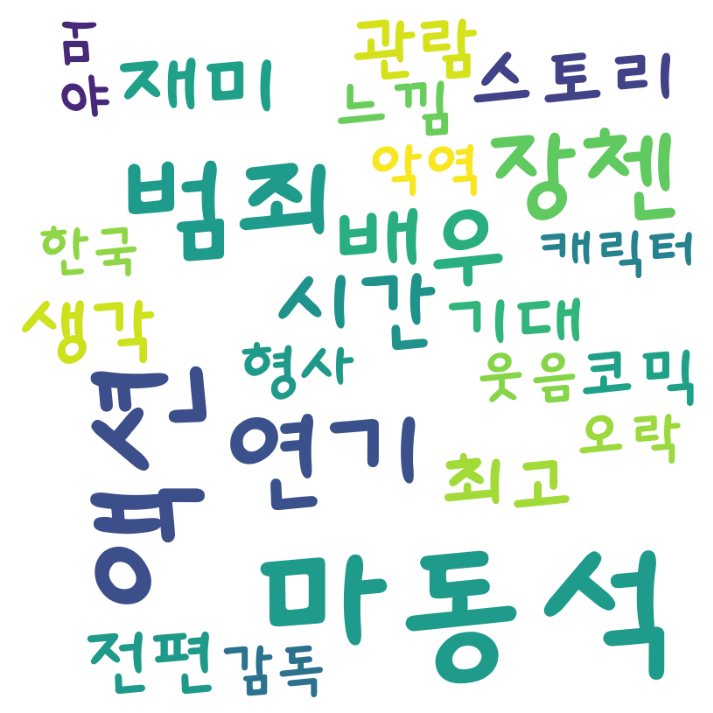

In [26]:
wc = WordCloud(max_font_size=200,
    font_path = 'gabia_solmee.ttf',
    background_color="white",
    width=800, height=800).generate_from_frequencies(word) 
    

plt.figure(figsize = (10,10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()